## 📅 Dia 2 – Introdução ao PyTorch + MNIST

### 🎯 Objetivo:
Aprender a usar PyTorch para construir uma rede neural simples com base no dataset MNIST.

### 📚 Teoria:

#### 🧱 Componentes do PyTorch
- **`torch.nn.Module`**: classe base para modelos.
- **`nn.Linear`**: camadas densas.
- **`F.relu`, `F.softmax`, etc.**: funções de ativação.
- **`loss_fn`**: função de perda (ex: `CrossEntropyLoss`).
- **`optimizer`**: atualização dos pesos (ex: `SGD`, `Adam`).

#### 📦 Dataset MNIST
- Imagens 28x28 pixels em tons de cinza.
- Dígitos de 0 a 9.
- Conjunto clássico para classificação.

#### ⚙️ Otimizadores
- **SGD (Stochastic Gradient Descent)**: simples e direto.
- **Adam**: adaptativo, geralmente mais rápido e eficaz.

#### 📉 Funções de perda e métricas
- **Loss**: `sparse_categorical_crossentropy` (para classificações inteiras).
- **Métricas**: `accuracy`.

### 🛠 Prática:
- Criar um modelo para MNIST com 1 camada oculta
- Treinar e avaliar com accuracy, loss
- Plotar gráfico de acurácia e perda por época
- Modificar o modelo:
- Mais camadas
- Função de ativação diferente
- Alterar epochs, batch_size

---

# **Pytorch**
Uma biblioteca de ML para Deep Learning.

**Tensores:** variáveis indexadas(arrays) multidimensionais usadas como base para todas as operações avançadas.

**5 tipos de tensores:**
- **HalfTensor:** 16-bit float
- **FloatTensor:** 32-bit float
- **DoubleTensor:** 64-bit float
- **IntTensor:** 32-bit int
- **LongTensor:** 64-bit int

**0D: um único valor real** -> esc = torch.tensor(7)

**1D: vetor** -> notas = torch.tensor([8.5, 9.0, 7.0])

**2D: matriz** -> matriz = torch.tensor([[1, 2], [3, 4]]) ou t = torch.rand(2, 3) # Cria um tensor 2x3 com números aleatórios entre 0 e 1

**3D: Imagens** 
- imagemPretoBraco = torch.rand(1, 28, 28) # 1 canal (preto e branco), 28x28 pixels
- imaemRGB = torch.rand(32, 3, 224, 224)  # 32 imagens, RGB, 224x224

OBS: o padrão é FloatTensor, e para alterar utiliza-se torch.set_default_tensor_type(t)

**Referência:** 
- https://www.insightlab.ufc.br/tutorial-pytorch-um-guia-rapido-para-voce-entender-agora-os-fundamentos-do-pytorch/

---

###  **Importando as bibliotecas básicas**

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

###  **Definir o conjunto de dados**
Nesse caso será utilizado o mesmo exemplo prático do dia anterior (XOR)

In [3]:
# Dados de entrada (XOR)
entradas = torch.tensor([[0, 0],
                         [0, 1],
                         [1, 0],
                         [1, 1]], dtype=torch.float32)

# Saídas desejadas
saidas = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

### **Criando o modelo: subclasse de nn.Module**
É a classe base de todos os modelos de redes neurais em PyTorch. Sempre que criado uma rede neural personalizada, é necessário herdar essa classe.

In [5]:
class RedeXOR(nn.Module): #Herdando o nn.Module
    def __init__(self):
        super(RedeXOR, self).__init__()
        self.oculta = nn.Linear(2, 2) # Camada oculta com 2 neurônios
        self.saida = nn.Linear(2, 1) # Camada de saída

    def forward(self, x):
        x = torch.tanh(self.oculta(x)) # Ativação tanh na oculta
        x = torch.sigmoid(self.saida(x)) # Sigmoid na saída
        return x

### **Instanciando o Modelo**

In [6]:
modelo = RedeXOR()

### **Definindo a Função de Perda e Otimizador**
Componentes responsáveis por **atualizar os pesos da rede**, ajudando a minimizar a função de perda.

### **Otimizadores mais utilizados:**
- **SGD (Stochastic Gradient Descent):** O mais simples, atualiza pesos usando uma fração aleatória dos dados.
- **RMSprop:** Ajusta o tamanho do passo com base na média dos gradientes anteriores. Muito bom para RNNs.
- **Momentum:** Acelera o SGD acumulando velocidade (como uma bola rolando ladeira abaixo).
- **Adam:** O mais usado atualmente, combina vantagens do SGD com Momentos e adapta a taxa de aprendizado automaticamente.

In [7]:
criterio = nn.MSELoss() # Função de perda: erro quadrático médio
otimizador = optim.SGD(modelo.parameters(), lr=0.1) # Gradiente descendente

### **Treinamento**

In [8]:
for epoca in range(10000):
    saidas_preditas = modelo(entradas) #forward
    perda = criterio(saidas_preditas, saidas) #calcula erro

    otimizador.zero_grad() #zera gradientes anteriores
    perda.backward() #backpropagation: calcula novos gradientes
    otimizador.step() #atualiza os pesos

### **Resultado**

In [9]:
print("Saídas após o treinamento:")
print(modelo(entradas).detach())

Saídas após o treinamento:
tensor([[0.0292],
        [0.9625],
        [0.9628],
        [0.0258]])


---

# **nn.Linear**
A classe torch.nn.Linear cria uma camada totalmente conectada (também chamada de camada densa). Ela faz uma operação matemática simples:

``saida = xW + b``

Ou seja, ela:

multiplica a entrada x pelos pesos W, e soma um viés b.

## **Sintaxe: nn.Linear(in_features, out_features)**
**in_features:** número de entradas (ou seja, quantos valores entram no neurônio)

**out_features:** número de neurônios (ou saídas da camada)

### **Exemplo:**

In [ ]:
# Cria uma camada com 3 entradas e 2 saídas
camada = nn.Linear(3, 2)

# Exemplo de entrada (1 amostra com 3 valores)
entrada = torch.tensor([[1.0, 2.0, 3.0]])

# Passa a entrada pela camada
saida = camada(entrada)

print(saida)

tensor([[ 1.0292, -0.0239]], grad_fn=<AddmmBackward0>)


A camada automaticamente cria dois parâmetros treináveis:
- weight: matriz de pesos com forma (out_features, in_features)

- bias: vetor de viés com forma (out_features)

In [ ]:
print(camada.weight)
print(camada.bias)

Parameter containing:
tensor([[ 0.0078, -0.4095,  0.0364],
        [ 0.3573,  0.0399,  0.4778]], requires_grad=True)
Parameter containing:
tensor([0.4380, 0.4809], requires_grad=True)


**Obs:** nao é obrigatório igual ao nn.linear, mas é muito util para camadas densas

---

## **Funções de Ativação no Pytorch**

In [10]:
import torch.nn.functional as F

As funções de ativação mais comuns são:
- **F.relu(x):** 
    if x < 0:
        x = 0
    else:
        x = x #permanece igual

    evita problemas com gradientes pequenos.

- **F.softmax(x, dim=1):**
    Transforma os valores em probabilidades (soma = 1)
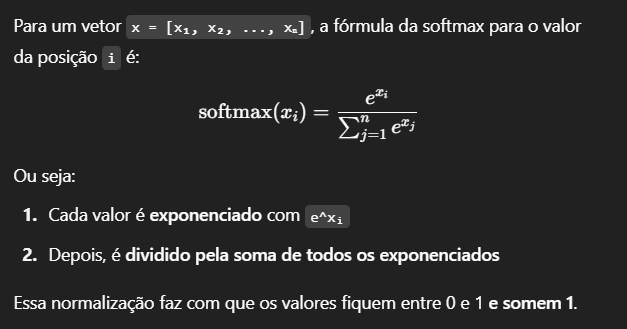

- **Outras:**

| Função                    | O que faz                                                  | Onde usar                   |
| ------------------------- | ---------------------------------------------------------- | --------------------------- |
| `F.sigmoid(x)`            | Transforma saída entre 0 e 1                               | Saídas binárias             |
| `F.tanh(x)`               | Saída entre -1 e 1, mais suave que ReLU                    | Às vezes em camadas ocultas |
| `F.leaky_relu(x)`         | Variante da ReLU que não zera totalmente valores negativos | Camadas ocultas             |
| `F.log_softmax(x, dim=1)` | Aplica softmax + log (mais estável numericamente)          | Antes da `NLLLoss()`        |


In [14]:
#exemplo softmax

logits = torch.tensor([[2.0, 1.0, 0.1]])  # 3 classes
probs = F.softmax(logits, dim=1)

print("Probabilidades:", probs)
print("Soma das probabilidades:", probs.sum())  # Deve dar 1.0


Probabilidades: tensor([[0.6590, 0.2424, 0.0986]])
Soma das probabilidades: tensor(1.0000)


---

## **Função de Perda no Pytorch**

| Função                | Uso típico                            |
| --------------------- | ------------------------------------- |
| `nn.MSELoss`          | Regressão                             |
| `nn.BCELoss`          | Classificação binária                 |
| `nn.CrossEntropyLoss` | Classificação multiclasse             |
| `nn.NLLLoss`          | Softmax já aplicado manualmente antes |


**OBS:** nn.CrossEntropyLoss() já aplica softmax internamente nos logits

In [16]:
# Previsões do modelo (logits brutos, sem softmax)
logits = torch.tensor([[2.0, 1.0, 0.1]])  # 1 amostra, 3 classes

# Classe verdadeira (classe 0)
target = torch.tensor([0])  # rótulo verdadeiro

# Função de perda
loss_fn = nn.CrossEntropyLoss()

# Calcula a perda
loss = loss_fn(logits, target)
print(loss.item())  # valor escalar da perda

0.4170299470424652


---

## **Otimizadores no Pytorch**

**Otimizador:** Componente que atualiza os pesos e biases da rede neural com base nos gradientes calculados pela backpropagation e na função de perda

``novo_peso = peso_atual - taxa_aprendizado * gradiente``

**Gradiente:** é uma derivada parcial da função de perda em relação a cada peso. Quanto maior, maior o ajuste necessário.

Durante a backpropagation, o **PyTorch calcula os gradientes automaticamente** para cada peso. Esses gradientes são usados pelo otimizador para atualizar os pesos e reduzir o erro da rede.

- **Otimizadores mais comuns:**

| Otimizador                          | Característica                                             |
| ----------------------------------- | ---------------------------------------------------------- |
| `SGD` (Stochastic Gradient Descent) | Simples e eficiente, pode usar momentum                    |
| `Adam` (Adaptive Moment Estimation) | Mais robusto, adapta a taxa de aprendizado por parâmetro   |
| `RMSprop`                           | Similar ao Adam, bom para redes recorrentes                |
| `Adagrad`                           | Adapta a taxa de aprendizado com base na frequência de uso |


In [18]:
model = nn.Linear(2, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # fala quais parametros o otimizador deve atualizar
loss_fn = nn.MSELoss()

x = torch.randn(10, 2)
y = torch.randn(10, 1)

# Treinamento (1 passo)
pred = model(x)
loss = loss_fn(pred, y)
optimizer.zero_grad()
loss.backward()
optimizer.step()

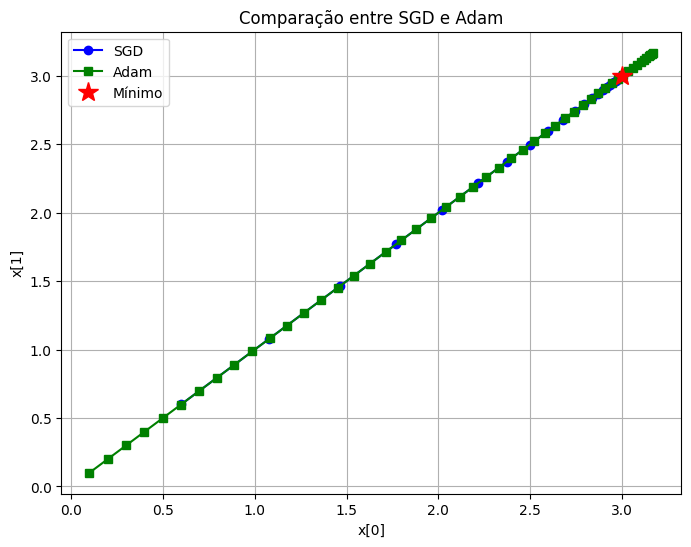

In [19]:
import matplotlib.pyplot as plt

# Função objetivo simples: mínimo em (3, 3)
def func(x):
    return (x[0] - 3)**2 + (x[1] - 3)**2

# Gradiente da função
def grad(x):
    return torch.tensor([2*(x[0]-3), 2*(x[1]-3)])

# Inicialização
x_sgd = torch.tensor([0.0, 0.0], requires_grad=True)
x_adam = torch.tensor([0.0, 0.0], requires_grad=True)

sgd = torch.optim.SGD([x_sgd], lr=0.1)
adam = torch.optim.Adam([x_adam], lr=0.1)

sgd_path, adam_path = [], []

# Treinamento
for _ in range(50):
    # SGD
    sgd.zero_grad()
    loss_sgd = func(x_sgd)
    loss_sgd.backward()
    sgd.step()
    sgd_path.append(x_sgd.detach().numpy().copy())

    # Adam
    adam.zero_grad()
    loss_adam = func(x_adam)
    loss_adam.backward()
    adam.step()
    adam_path.append(x_adam.detach().numpy().copy())

# Plotando os caminhos
sgd_path = torch.tensor(sgd_path)
adam_path = torch.tensor(adam_path)

plt.figure(figsize=(8, 6))
plt.plot(sgd_path[:, 0], sgd_path[:, 1], 'o-', label="SGD", color='blue')
plt.plot(adam_path[:, 0], adam_path[:, 1], 's-', label="Adam", color='green')
plt.plot(3, 3, 'r*', markersize=15, label="Mínimo")
plt.xlabel("x[0]")
plt.ylabel("x[1]")
plt.title("Comparação entre SGD e Adam")
plt.legend()
plt.grid(True)
plt.show()


**SGD (azul):** avança de forma mais lenta e direta.

**Adam (verde):** converge mais rapidamente ao mínimo com passos mais adaptativos.

Isso mostra como Adam pode ser mais eficiente que o SGD em muitos casos práticos, especialmente quando o terreno da função é mais complexo.

---

## Métricas no pytorch - Acurácia
preds = torch.argmax(output, dim=1)
acc = (preds == labels).float().mean()


In [74]:
# Dados fictícios (exemplo com 3 classes)
X = torch.tensor([[1.0, 2.0], [2.0, 1.0], [0.0, 1.0], [1.0, 0.0]])
y = torch.tensor([0, 1, 2, 1])  # Rótulos inteiros

# Modelo simples
class Modelo(nn.Module):
    def __init__(self):
        super(Modelo, self).__init__()
        self.fc1 = nn.Linear(2, 3)  #Entrada com 2 features, saída com 3 classes

    def forward(self, x):
        return self.fc1(x)  #CrossEntropy já aplica softmax internamente

model = Modelo()

# Função de perda e otimizador
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Treinamento
for epoch in range(100):
    # Forward
    output = model(X)
    loss = loss_fn(output, y)

    # Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Métrica: Accuracy
    preds = torch.argmax(output, dim=1)
    acc = (preds == y).float().mean()

    if epoch % 10 == 0:
        print(f"Época {epoch:3d} | Loss: {loss.item():.4f} | Acurácia: {acc.item()*100:.2f}%")


Época   0 | Loss: 1.5557 | Acurácia: 25.00%
Época  10 | Loss: 0.6553 | Acurácia: 75.00%
Época  20 | Loss: 0.3094 | Acurácia: 100.00%
Época  30 | Loss: 0.1695 | Acurácia: 100.00%
Época  40 | Loss: 0.1070 | Acurácia: 100.00%
Época  50 | Loss: 0.0758 | Acurácia: 100.00%
Época  60 | Loss: 0.0584 | Acurácia: 100.00%
Época  70 | Loss: 0.0476 | Acurácia: 100.00%
Época  80 | Loss: 0.0401 | Acurácia: 100.00%
Época  90 | Loss: 0.0346 | Acurácia: 100.00%


---

# Prática: 
https://www.youtube.com/watch?v=gBw0u_5u0qU

### **Bibliotecas**

In [21]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [22]:
x, y = torch.load('MNIST\\processed\\training.pt')

In [23]:
x

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [24]:
y

tensor([5, 0, 4,  ..., 5, 6, 8])

In [25]:
x.shape

torch.Size([60000, 28, 28])

In [26]:
x[2].numpy()

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

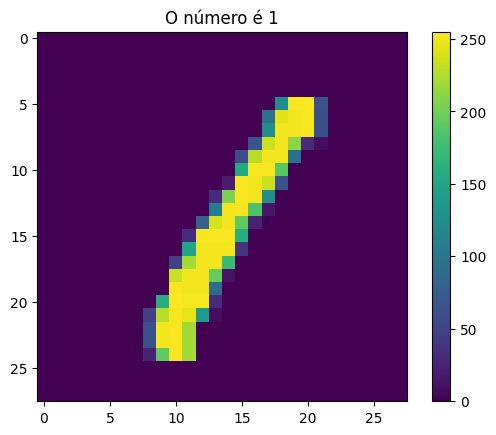

In [27]:
plt.imshow(x[3].numpy())
plt.title(f'O número é {y[3]. numpy()}')
plt.colorbar()
plt.show()

In [28]:
y[3]

tensor(1)

### **One hot encoder**

In [29]:
y_original = torch.tensor([2,4,3,0,1])

In [30]:
F.one_hot(y_original)

tensor([[0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0]])

In [31]:
y_original

tensor([2, 4, 3, 0, 1])

In [32]:
y_original[2]

tensor(3)

In [33]:
y_new = F.one_hot(y_original, num_classes=6)

In [34]:
y_original

tensor([2, 4, 3, 0, 1])

In [35]:
y_new

tensor([[0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0]])

In [36]:
y.shape

torch.Size([60000])

In [37]:
y_new = F.one_hot(y, num_classes=10)
y_new.shape

torch.Size([60000, 10])

In [38]:
y_new

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 1, 0]])

Problemas com Imagens

In [39]:
x.shape

torch.Size([60000, 28, 28])

In [40]:
x.view(-1,28*2).shape

torch.Size([840000, 56])

### **Pytorch dataset object**

In [41]:
class CTDataset(Dataset):
    def __init__(self, filepath):
        self.x, self.y = torch.load(filepath)
        self.x = self.x / 225.
        self.y = F.one_hot(self.y, num_classes=10).to(float)

    def __len__(self):
        return self.x.shape[0]
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]

In [42]:
train_ds = CTDataset('MNIST\\processed\\training.pt')
test_ds = CTDataset('MNIST\\processed\\test.pt') 

In [43]:
len(train_ds)

60000

In [44]:
len(test_ds)

10000

In [45]:
train_ds[0]

(tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000,

In [46]:
xs, ys = train_ds[0:4]

In [47]:
xs.shape

torch.Size([4, 28, 28])

In [48]:
ys.shape

torch.Size([4, 10])

### **Pytorch DataLoader Object**

In [49]:
train_dl = DataLoader(train_ds, batch_size=5)

In [50]:
for x,y in train_dl:
    print(x.shape)
    print(y.shape)
    break

torch.Size([5, 28, 28])
torch.Size([5, 10])


In [51]:
len(train_dl)

12000

### **Cross Entropy Loss**

In [52]:
L = nn.CrossEntropyLoss()

A rede 

In [53]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2, 100)
        self.Matrix2 = nn.Linear(100, 50)
        self.Matrix3 = nn.Linear(50, 10)
        self.R = nn.ReLU() #funcao de ativacao

    def forward(self, x):
        x = x.view(-1,28**2) # -1 significa “automaticamente ajuste esse tamanho com base no batch”.
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.Matrix3(x) # camada de saída
        return x.squeeze() # Remove dimensões extras do resultado, caso haja alguma

In [54]:
f = MyNeuralNet()

In [55]:
xs.shape

torch.Size([4, 28, 28])

In [56]:
f(xs)

tensor([[ 0.0653,  0.0687,  0.0880, -0.1177,  0.0067, -0.0157, -0.0857, -0.0695,
         -0.0016,  0.0583],
        [ 0.0664,  0.1133,  0.0811, -0.1433,  0.0120,  0.0406, -0.1086, -0.0457,
          0.0135,  0.0800],
        [ 0.1172,  0.0634,  0.0745, -0.1166,  0.0593, -0.0194, -0.1276, -0.0443,
          0.0288, -0.0139],
        [ 0.0687,  0.0874,  0.1057, -0.1208,  0.0035,  0.0416, -0.1113, -0.0434,
         -0.0088,  0.0389]], grad_fn=<SqueezeBackward0>)

In [57]:
ys

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=torch.float64)

In [58]:
L(f(xs),ys)

tensor(2.2607, dtype=torch.float64, grad_fn=<DivBackward1>)

### **Treinamento**

In [59]:
def train_model(dl, f, n_epochs = 20):
    #Otimizador
    opt = SGD(f.parameters(), lr =0.01)
    L = nn.CrossEntropyLoss()

    #Modelo de Treinamento
    losses = []
    epochs = []
    for epoch in range(n_epochs):
        print(f"épocas {epoch}")
        N = len(dl)
        for i, (x,y) in enumerate(dl):
            #atualiza os pesos
            opt.zero_grad()
            loss_value = L(f(x), y)
            loss_value.backward()
            opt.step()

            #Armazenando os dados do treinamento
            epochs.append(epoch+i/N)
            losses.append(loss_value.item())
    return np.array(epochs), np.array(losses)

In [60]:
epoch_data, loss_data = train_model(train_dl, f)

épocas 0
épocas 1
épocas 2
épocas 3
épocas 4
épocas 5
épocas 6
épocas 7
épocas 8
épocas 9
épocas 10
épocas 11
épocas 12
épocas 13
épocas 14
épocas 15
épocas 16
épocas 17
épocas 18
épocas 19


#### **Plotando a função de perda L(f(xs), ys) para cada batch de xs, ys (tamanho do batch é 5) ao longo do procedimento de treinamento.**

Text(0.5, 1.0, 'Cross-Entropy por Batch')

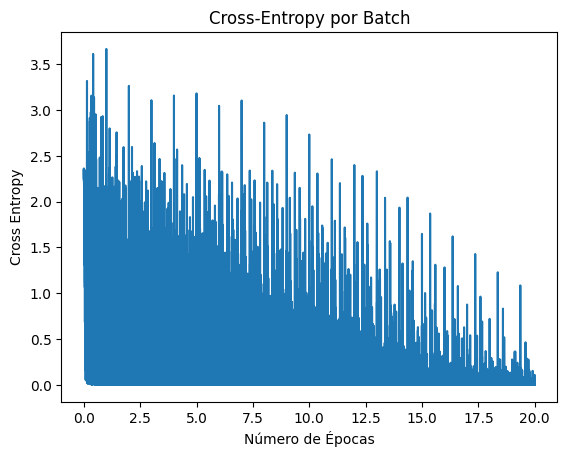

In [61]:
plt.plot(epoch_data, loss_data)
plt.xlabel("Número de Épocas")
plt.ylabel("Cross Entropy")
plt.title("Cross-Entropy por Batch")

In [62]:
loss_data.reshape(20,-1).shape

(20, 12000)

In [63]:
epoch_data_avgd = epoch_data.reshape(20, -1).mean(axis=1)
loss_data_avgd = loss_data.reshape(20,-1).mean(axis=1)

Text(0.5, 1.0, 'Cross Entropy (avgd per epoch)')

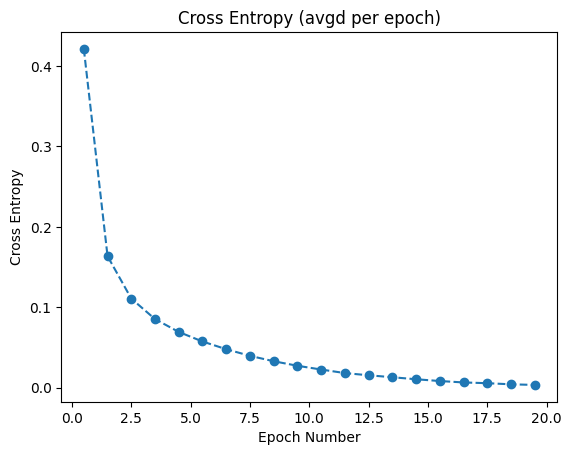

In [64]:
plt.plot(epoch_data_avgd, loss_data_avgd, 'o--')
plt.xlabel("Epoch Number")
plt.ylabel("Cross Entropy")
plt.title("Cross Entropy (avgd per epoch)")

In [65]:
train_ds[0]

(tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000,

In [66]:
y_sample = train_ds[0][1]
y_sample

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=torch.float64)

In [67]:
x_sample = train_ds[0][0]
yhat_sample = f(x_sample)
yhat_sample

tensor([ -7.3119,   3.0168,   1.1941,  22.8107, -28.2226,  30.1174, -17.8535,
          5.6569, -12.7761,   0.0389], grad_fn=<SqueezeBackward0>)

In [68]:
torch.argmax(yhat_sample)

tensor(5)

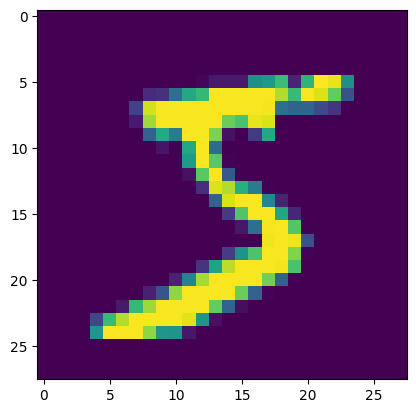

In [69]:
plt.imshow(x_sample)

In [70]:
xs, ys = train_ds[0:2000]
yhats = f(xs).argmax(axis=1)


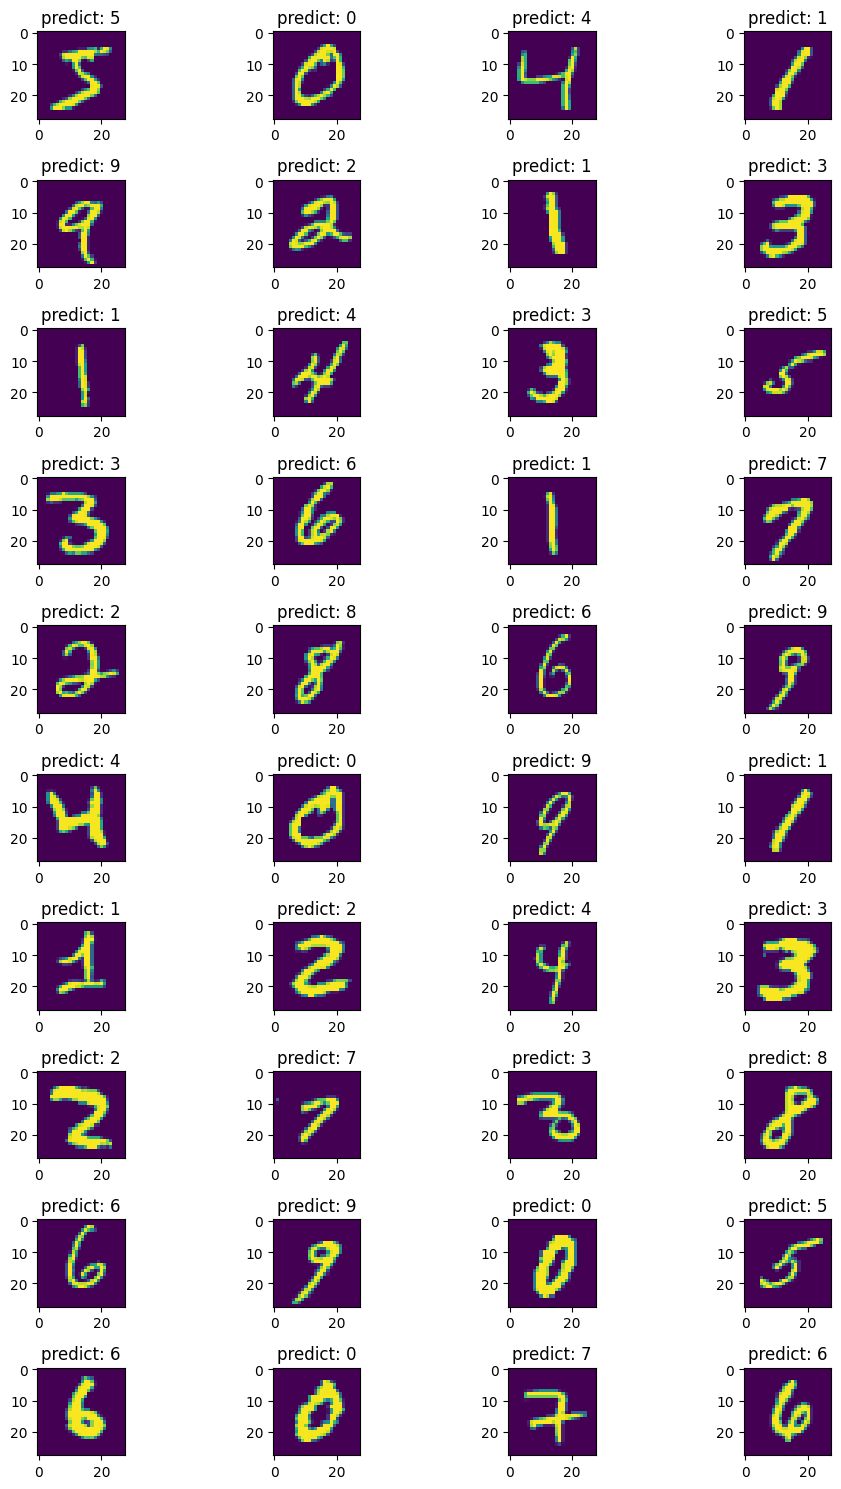

In [71]:
fig, ax = plt.subplots(10,4,figsize=(10,15))
for i in range(40):
    plt.subplot(10,4, i+1)
    plt.imshow(xs[i])
    plt.title(f"predict: {yhats[i]}")
fig.tight_layout()
plt.show()

In [72]:
xs, ys = test_ds[:2000]
y_hats = f(xs).argmax(axis=1)

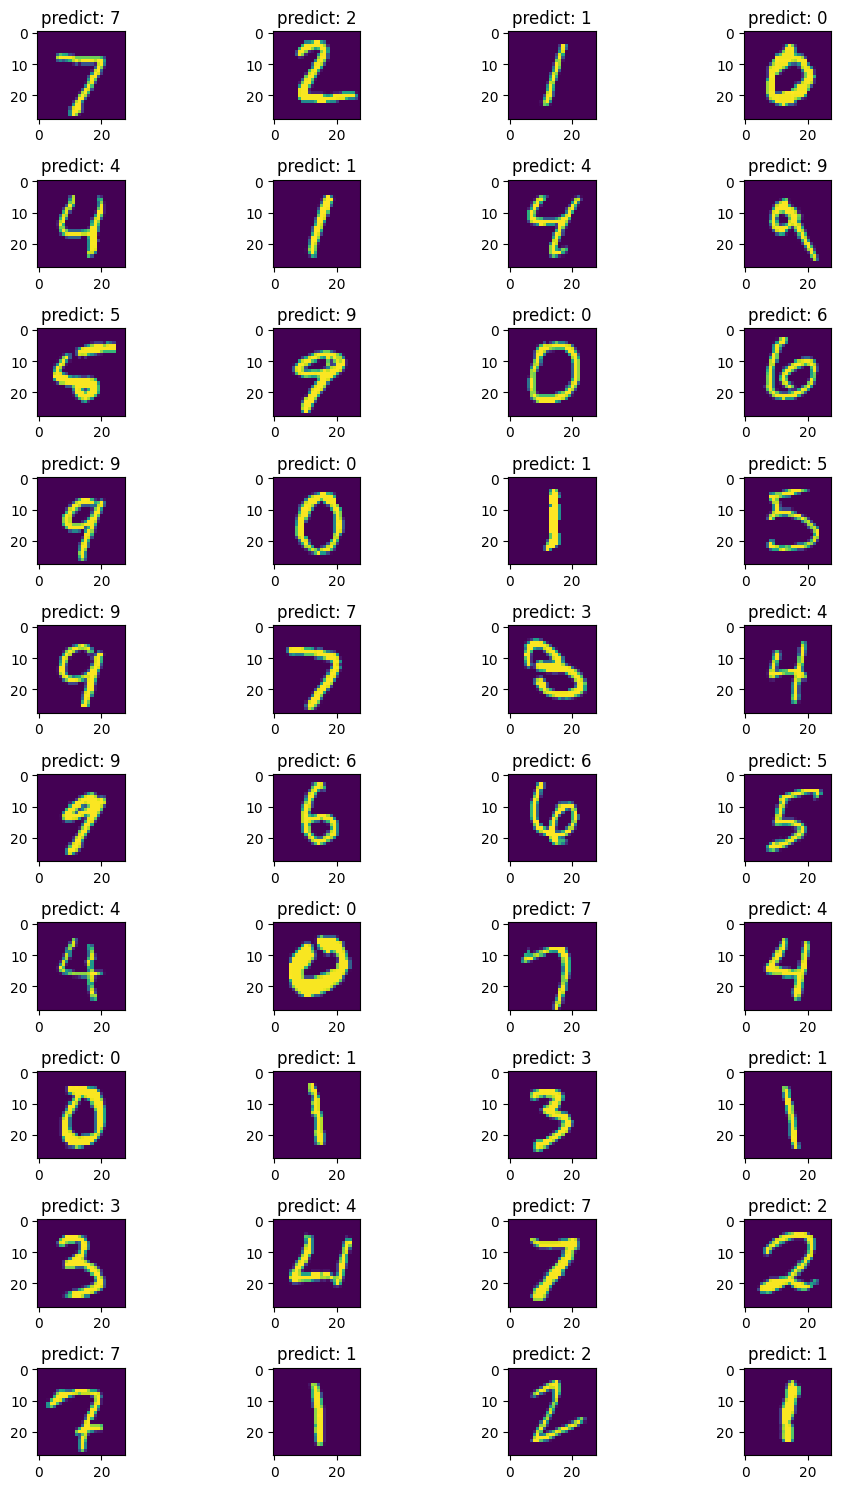

In [73]:
fig, ax = plt.subplots(10, 4, figsize = (10,15))
for i in range(40):
    plt.subplot(10, 4, i+1)
    plt.imshow(xs[i])
    plt.title(f"predict: {y_hats[i]}")
fig.tight_layout()
plt.show()